In [90]:
#import modules
# https://www.datacamp.com/tutorial/discovering-hidden-topics-python
# tutorial: https://radimrehurek.com/gensim/auto_examples/howtos/run_compare_lda.html#sphx-glr-auto-examples-howtos-run-compare-lda-py

import nltk
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from urbandev.utils import load_data_csv, save_data


In [2]:
#download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/mojoee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = load_data_csv('/home/mojoee/Research/11_UrbanDevelopment/03_UrbanDevelopmentTaiwan/data/translatedJoinProposalsCombined.csv')

In [4]:
def reshapeData(df):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    #drop zeros
    df=df.dropna()
    df= df[df['proposalEN'] != 0]
    documents_list = df["proposalEN"].to_list()
    titles=df["titleEN"].to_list()
    print("Total Number of Documents:",len(df.index))
    return documents_list,titles

In [6]:
def preprocess_data(doc_set):
    """
    Input  : document list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


In [7]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix


In [8]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel


In [9]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

Total Number of Documents: 13992


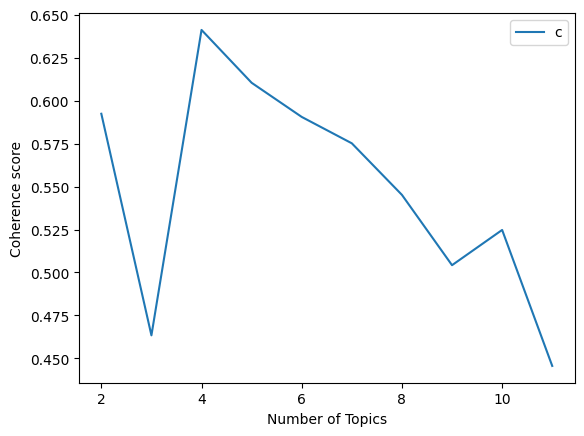

In [10]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

document_list,titles=reshapeData(df)
clean_text=preprocess_data(document_list)
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [12]:
# LSA Model
number_of_topics=4
words=20
model=create_gensim_lsa_model(clean_text,number_of_topics,words)


[(0, '0.723*"fals" + 0.239*"name" + 0.239*"w" + 0.238*"prioriti" + 0.236*"lock" + 0.236*"lsdexcept" + 0.235*"semihidden" + 0.235*"unhidewhenus" + 0.168*"accent" + 0.100*"medium" + 0.081*"1" + 0.078*"2" + 0.074*"list" + 0.073*"grid" + 0.057*"shade" + 0.049*"mso" + 0.045*"3" + 0.044*"light" + 0.042*"color" + 0.038*"true"'), (1, '0.231*"peopl" + 0.197*"year" + 0.174*"taiwan" + 0.163*"time" + 0.161*"govern" + 0.160*"law" + 0.158*"1" + 0.145*"school" + 0.144*"public" + 0.140*"2" + 0.140*"use" + 0.119*"also" + 0.115*"nation" + 0.109*"mso" + 0.107*"3" + 0.097*"student" + 0.097*"countri" + 0.096*"articl" + 0.094*"high" + 0.089*"accord"'), (2, '-0.723*"mso" + -0.223*"0" + -0.222*"style" + -0.169*"languag" + -0.168*"0400" + -0.167*"0cm" + -0.166*"size" + -0.165*"font" + -0.112*"fareast" + -0.112*"roman" + -0.112*"4pt" + -0.112*"tstyle" + -0.111*"para" + -0.111*"margin" + -0.106*"famili" + -0.105*"new" + -0.097*"5" + -0.090*"time" + -0.056*"microsoftinternetexplorer4" + -0.056*"ansi"'), (3, '-0.6

In [13]:
model.print_topics()

[(0,
  '0.723*"fals" + 0.239*"name" + 0.239*"w" + 0.238*"prioriti" + 0.236*"lock" + 0.236*"lsdexcept" + 0.235*"unhidewhenus" + 0.235*"semihidden" + 0.168*"accent" + 0.100*"medium"'),
 (1,
  '0.231*"peopl" + 0.197*"year" + 0.174*"taiwan" + 0.163*"time" + 0.161*"govern" + 0.160*"law" + 0.158*"1" + 0.145*"school" + 0.144*"public" + 0.140*"2"'),
 (2,
  '-0.723*"mso" + -0.223*"0" + -0.222*"style" + -0.169*"languag" + -0.168*"0400" + -0.167*"0cm" + -0.166*"size" + -0.165*"font" + -0.112*"fareast" + -0.112*"roman"'),
 (3,
  '-0.611*"school" + -0.411*"student" + -0.270*"educ" + -0.204*"teacher" + -0.178*"high" + 0.160*"drive" + -0.132*"class" + 0.106*"driver" + -0.100*"teach" + -0.099*"learn"')]

In [14]:
# DSA
import jieba
from gensim import corpora, models
from TCSP import read_stopwords_list


stopwords = read_stopwords_list()
stopwords+=["\"","/","=",":","-",".","false",">",";","https", "~", "1", "2", "3", "4", "5", "6", 
             "7", "8", "9", "<", "w", "Priority","LsdException","Locked","SemiHidden","Name", "UnhideWhenUsed",
             "--","Accent", "!", "?", "+", "mso", "0", "*", "]", "["]

def preprocess(doc):
    tokens = jieba.cut(doc)
    return [word for word in tokens if word not in stopwords and word.strip()]

# Tokenize the documents using jieba
tokenized_documents = [preprocess(doc) for doc in document_list]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_documents)

# Create a bag of words corpus from the tokenized documents
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Train an LDA model
num_topics = 10
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

# Display the topics
for i in range(num_topics):
    print(f"Topic {i+1}: {lda_model.print_topic(i)}")


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.501 seconds.
Prefix dict has been built successfully.


Topic 1: 0.023*"Article" + 0.018*"shall" + 0.018*"law" + 0.017*"driving" + 0.015*"years" + 0.013*"drunk" + 0.012*"death" + 0.010*"Law" + 0.010*"criminal" + 0.008*"crime"
Topic 2: 0.012*"The" + 0.010*"use" + 0.007*"water" + 0.007*"Taiwan" + 0.006*"government" + 0.006*"food" + 0.006*"power" + 0.006*"also" + 0.006*"products" + 0.006*"It"
Topic 3: 0.027*"medical" + 0.023*"health" + 0.014*"military" + 0.014*"insurance" + 0.013*"women" + 0.011*"Health" + 0.011*"care" + 0.011*"people" + 0.011*"treatment" + 0.010*"service"
Topic 4: 0.004*"政府" + 0.003*"菸" + 0.003*"問題" + 0.003*"疫苗" + 0.003*"台灣" + 0.002*"Medium" + 0.002*"條" + 0.002*"學生" + 0.002*"工作" + 0.002*"無法"
Topic 5: 0.017*"traffic" + 0.016*"road" + 0.013*"car" + 0.012*"vehicles" + 0.011*"speed" + 0.010*"The" + 0.008*"driving" + 0.008*"license" + 0.007*"vehicle" + 0.007*"parking"
Topic 6: 0.029*"animals" + 0.025*"smoking" + 0.023*"animal" + 0.022*"dogs" + 0.018*"smoke" + 0.014*"protection" + 0.013*"cats" + 0.013*"stray" + 0.010*"pets" + 0.009

13992

In [15]:
def concatenate_topic(topic):
    output=[]
    for i in range(len(topic)):
        output.append(topic[i][0])
    return output

In [42]:
concatenate_topic(lda_model.show_topic(9))

['臺', '行政', '灣特別', '條', '政府', '年度', '地方法院', '立法院', '法律', '長']

In [39]:
# topics identified for n=10
# 0 crime
# 1 water, food, power --> basic needs
# 2 medical, insurance, military
# 3 error with chinese
# 4 Traffic and urban development
# 5 animals and pets
# 6 government and china politics
# 7 tax and salary
# 8 education
# 9 error with chinese

In [86]:
recognized_topics = {0: "crime", 1: "basicNeeds", 2: "medical", 3: "errorChin", 4:"Traffic&Cars", 5:"animals&pets", 6: "government&china", 7:"tax&salary",
                     8: "education", 9: "errorChin"}

In [43]:
for i in range(num_topics):
    print(concatenate_topic(lda_model.show_topic(i)))

['Article', 'shall', 'law', 'driving', 'years', 'drunk', 'death', 'Law', 'criminal', 'crime']
['The', 'use', 'water', 'Taiwan', 'government', 'food', 'power', 'also', 'products', 'It']
['medical', 'health', 'military', 'insurance', 'women', 'Health', 'care', 'people', 'treatment', 'service']
['政府', '菸', '問題', '疫苗', '台灣', 'Medium', '條', '學生', '工作', '無法']
['traffic', 'road', 'car', 'vehicles', 'speed', 'The', 'driving', 'license', 'vehicle', 'parking']
['animals', 'smoking', 'animal', 'dogs', 'smoke', 'protection', 'cats', 'stray', 'pets', 'hand']
['people', 'The', 'Taiwan', 'government', "'", 'public', 'country', 'I', 'In', 'China']
['The', '000', 'tax', 'yuan', 'year', 'government', 'salary', 'workers', 'labor', 'work']
['students', 'school', 'I', 'time', "'", 'high', 'The', 'schools', 'education', 'children']
['臺', '行政', '灣特別', '條', '政府', '年度', '地方法院', '立法院', '法律', '長']


In [ ]:
# Now how can I label the proposals ?

In [48]:
# visualize 

def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)


try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

In [56]:
print(models.LdaModel.__doc__)


Train and use Online Latent Dirichlet Allocation model as presented in
    `'Online Learning for LDA' by Hoffman et al.`_

    Examples
    -------
    Initialize a model using a Gensim corpus

    .. sourcecode:: pycon

        >>> from gensim.test.utils import common_corpus
        >>>
        >>> lda = LdaModel(common_corpus, num_topics=10)

    You can then infer topic distributions on new, unseen documents.

    .. sourcecode:: pycon

        >>> doc_bow = [(1, 0.3), (2, 0.1), (0, 0.09)]
        >>> doc_lda = lda[doc_bow]

    The model can be updated (trained) with new documents.

    .. sourcecode:: pycon

        >>> # In practice (corpus =/= initial training corpus), but we use the same here for simplicity.
        >>> other_corpus = common_corpus
        >>>
        >>> lda.update(other_corpus)

    Model persistency is achieved through :meth:`~gensim.models.ldamodel.LdaModel.load` and
    :meth:`~gensim.models.ldamodel.LdaModel.save` methods.

    


In [51]:
print(models.LdaModel.diff.__doc__)

Calculate the difference in topic distributions between two models: `self` and `other`.

        Parameters
        ----------
        other : :class:`~gensim.models.ldamodel.LdaModel`
            The model which will be compared against the current object.
        distance : {'kullback_leibler', 'hellinger', 'jaccard', 'jensen_shannon'}
            The distance metric to calculate the difference with.
        num_words : int, optional
            The number of most relevant words used if `distance == 'jaccard'`. Also used for annotating topics.
        n_ann_terms : int, optional
            Max number of words in intersection/symmetric difference between topics. Used for annotation.
        diagonal : bool, optional
            Whether we need the difference between identical topics (the diagonal of the difference matrix).
        annotation : bool, optional
            Whether the intersection or difference of words between two topics should be returned.
        normed : bool, optio

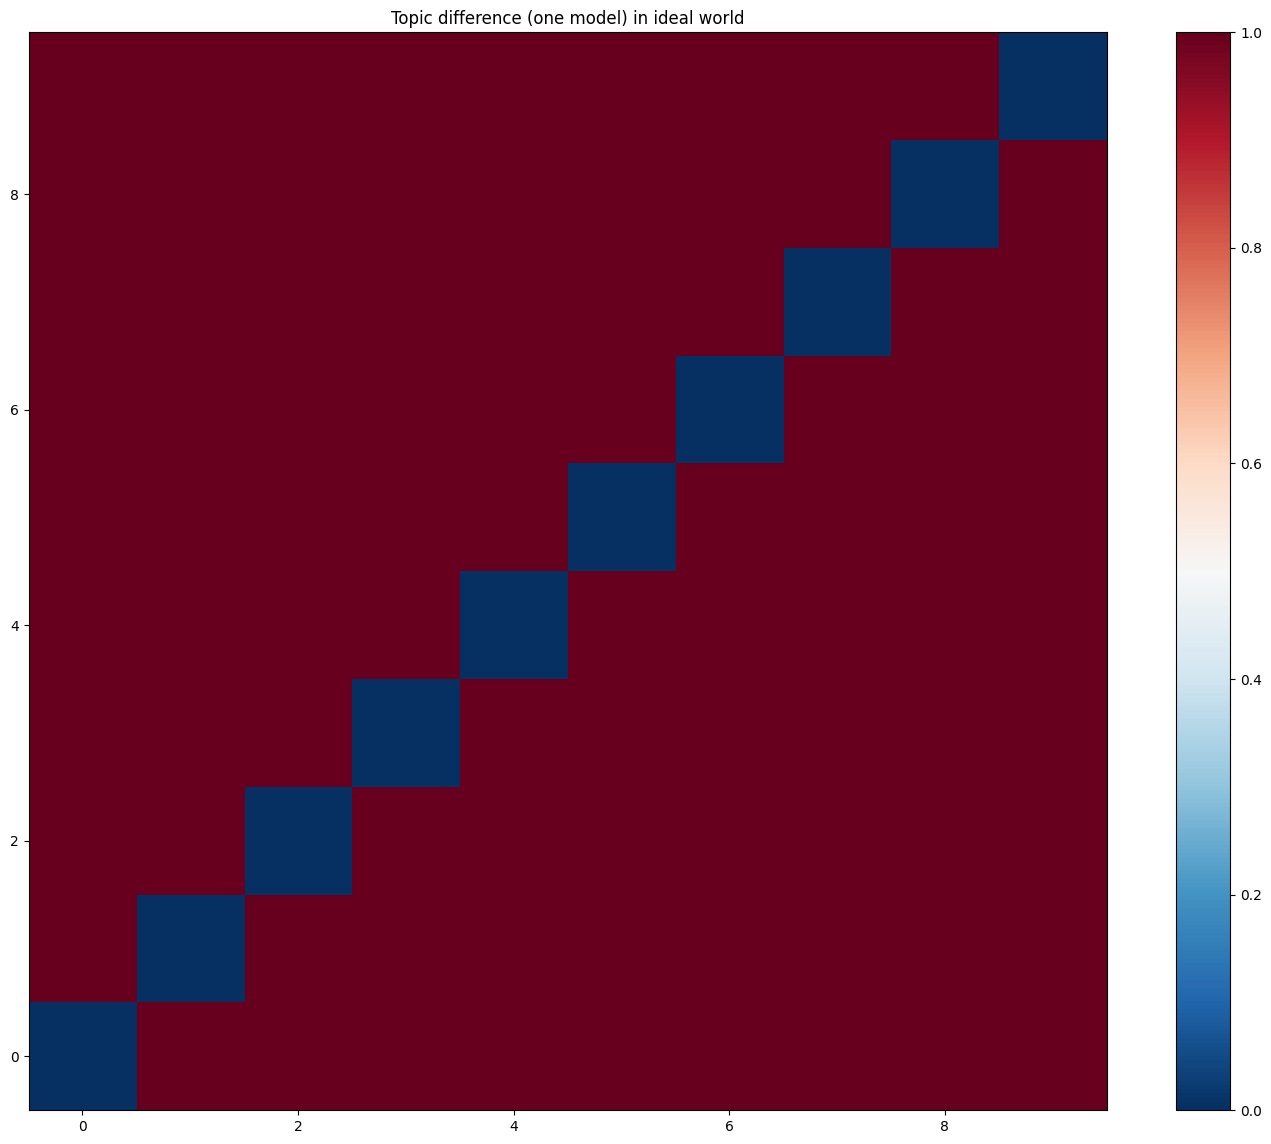

In [52]:
import numpy as np

mdiff = np.ones((num_topics, num_topics))
np.fill_diagonal(mdiff, 0.)
plot_difference(mdiff, title="Topic difference (one model) in ideal world")

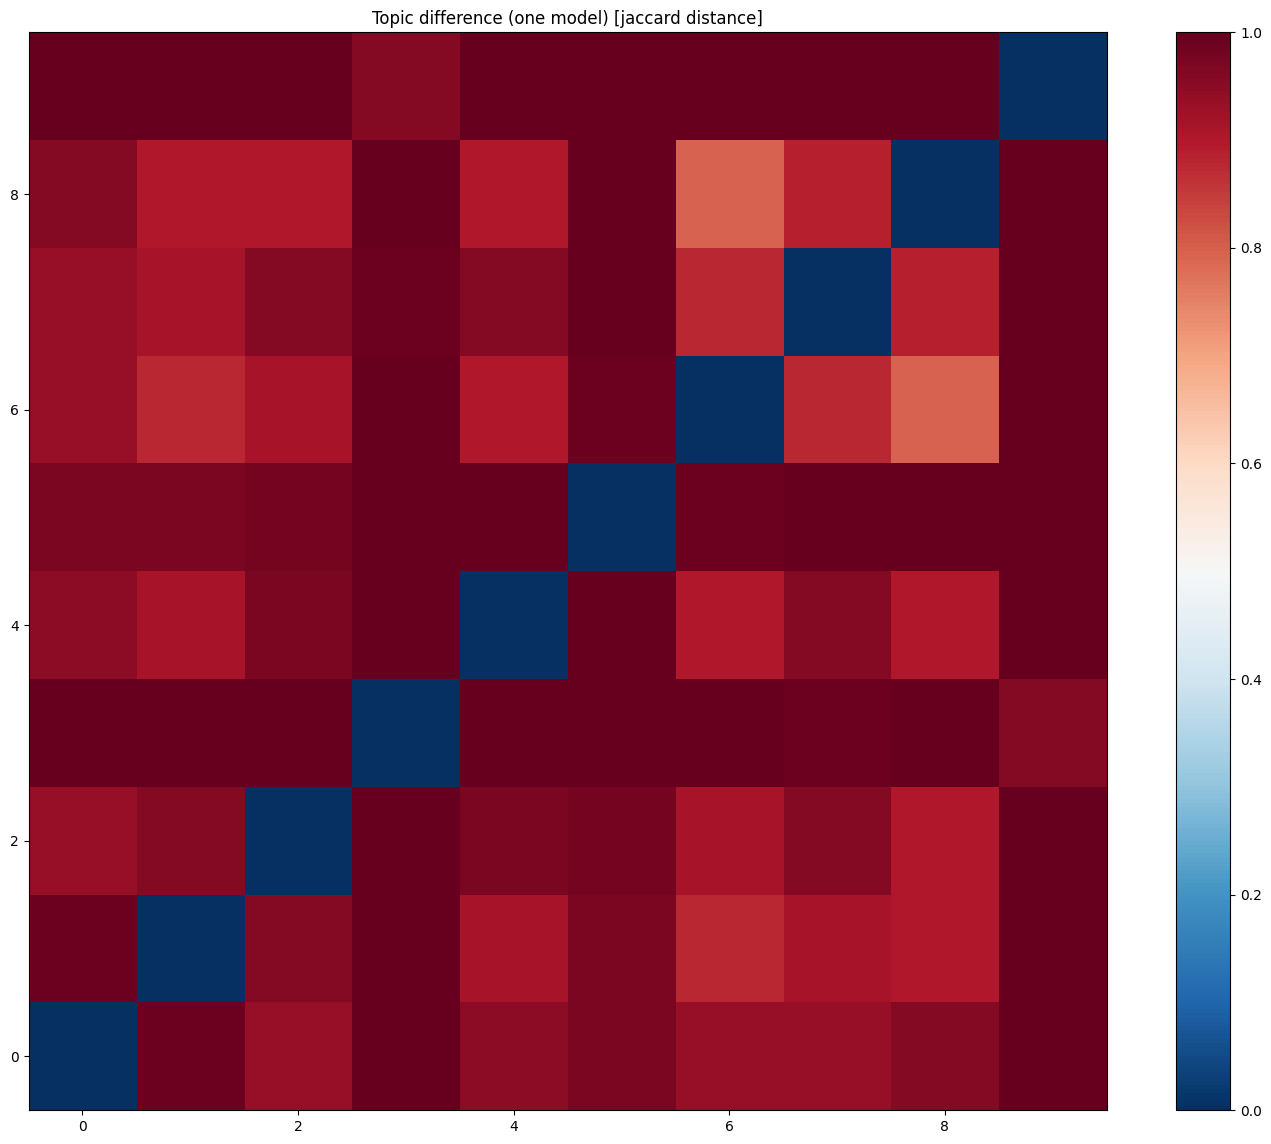

In [54]:
mdiff, annotation = lda_model.diff(lda_model, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

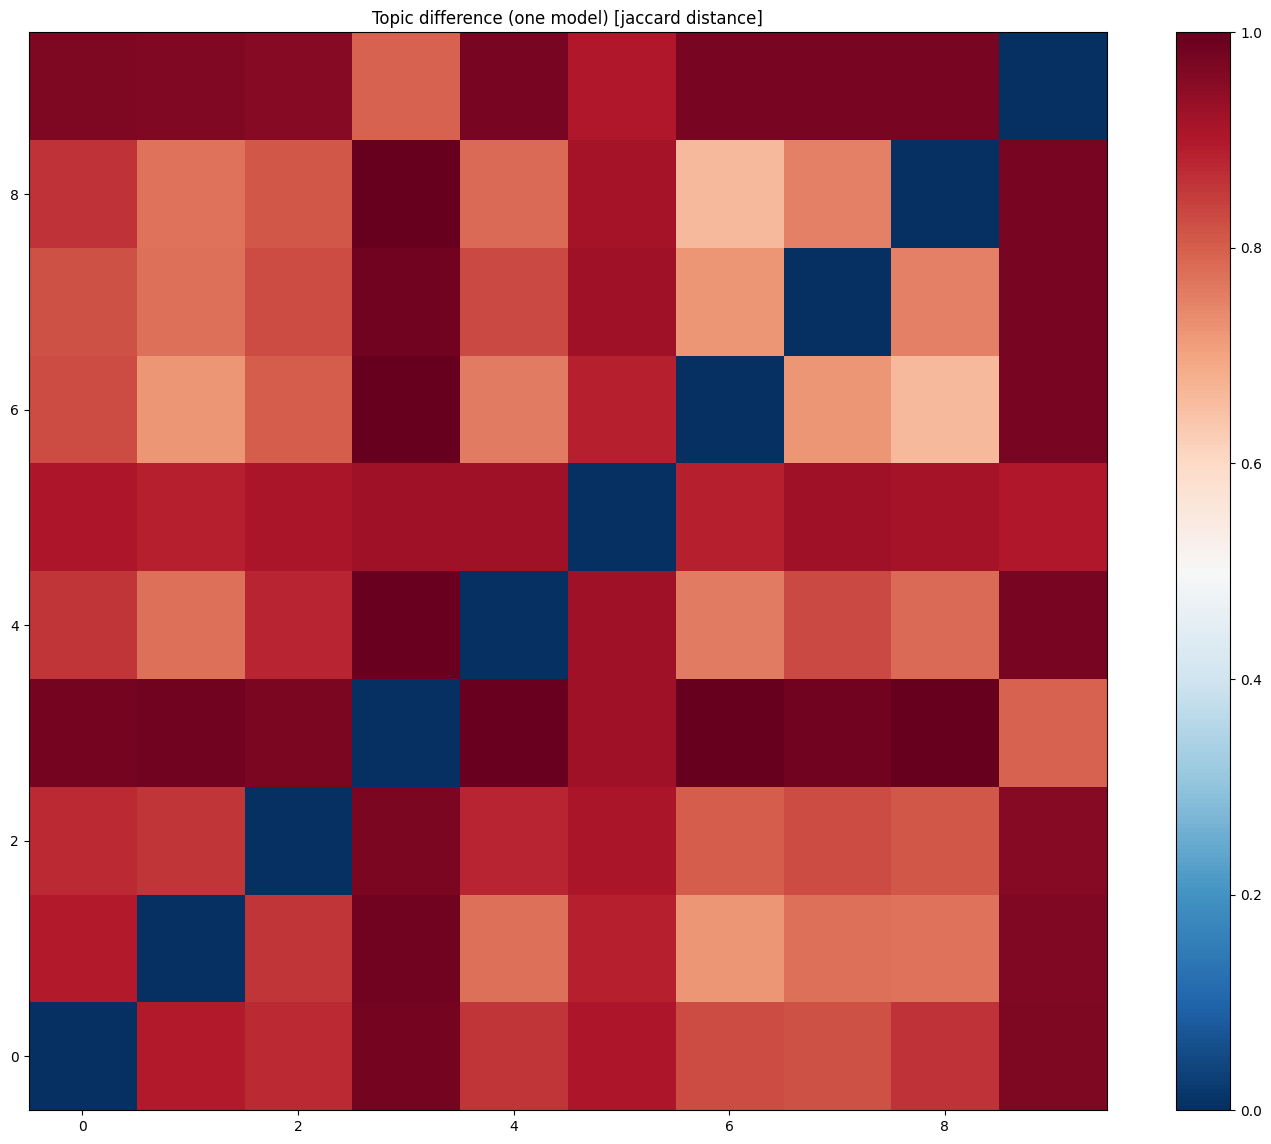

In [55]:
mdiff, annotation = lda_model.diff(lda_model, distance='hellinger', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

In [ ]:
# label the df 
lda_model.get_document_topics()

In [75]:
labels, _ = lda_model.inference(corpus)
topic_numbers = np.argmax(labels, axis=1)

In [83]:
df=df.dropna()
df['Topics'] = topic_numbers.tolist()

/tmp/ipykernel_62111/1732749101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'] = topic_numbers.tolist()


In [85]:
df.iloc[8]  


Index                                                                9
publishDate                                        2015-09-12 02:23:57
url                  https://join.gov.tw/idea/detail/87354c05-f36e-...
title                              敬請具體實踐中華民國憲法第143條：中華民國領土內之土地屬於國民全體。
proposal             中華民國公有土地，兩則相關條文內容如下：中華民國憲法第143條：中華民國領土內之土地屬於國民...
benefits&impact      建構「國民全體參與公有土地決策機制」之利益影響列舉如下：\n \n\n具體落實中華民國憲法第...
#Votes                                                              52
MinVotesNecessary                                                  250
SubmissionDate                                     2015-09-12 02:26:16
Followers                                                            2
Messages                                                             0
GA                                                                   無
proposer                                                   Che Wei Liu
proposalEN           The contents of the two related articles are a...
titleE

In [87]:
df["category"] = df["Topics"].apply(lambda x: recognized_topics[x])

/tmp/ipykernel_62111/59823364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"] = df["Topics"].apply(lambda x: recognized_topics[x])


In [89]:
save

Index                                                                9
publishDate                                        2015-09-12 02:23:57
url                  https://join.gov.tw/idea/detail/87354c05-f36e-...
title                              敬請具體實踐中華民國憲法第143條：中華民國領土內之土地屬於國民全體。
proposal             中華民國公有土地，兩則相關條文內容如下：中華民國憲法第143條：中華民國領土內之土地屬於國民...
benefits&impact      建構「國民全體參與公有土地決策機制」之利益影響列舉如下：\n \n\n具體落實中華民國憲法第...
#Votes                                                              52
MinVotesNecessary                                                  250
SubmissionDate                                     2015-09-12 02:26:16
Followers                                                            2
Messages                                                             0
GA                                                                   無
proposer                                                   Che Wei Liu
proposalEN           The contents of the two related articles are a...
titleE

In [92]:
save_data(df, "./results/labeledData.csv")

In [ ]:
## add second topic in case of close call or confusion